# Wave dataset Explained

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors Regressor class in scikit-learn. It’s used similarly to KNeighborsClassifier:


In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split
import mglearn
from matplotlib import pyplot as plt
import numpy as np

In [20]:
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3 
reg = KNeighborsRegressor(n_neighbors=3) 
# fit the model using the training data and training targets 
reg.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [47]:
# Now we can make prediction on the test set
print("Test set prediction:\n{}".format(reg.predict(X_test)))

print('Score: {:.2f}'.format(reg.score(X_test,y_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Score: 0.83


# Analyzing KNeighborsRegressor


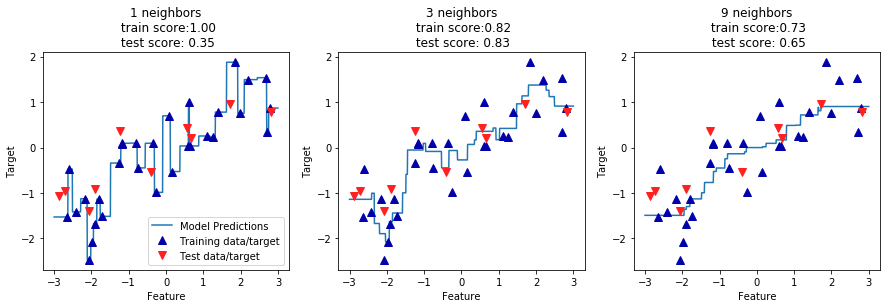

In [81]:
flg,axes=plt.subplots(1,3,figsize=(15,4))

#create 1,000 data points, evenly spaced between -3 and 3
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    #make prediction using 1,3 or 9 neighbors
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title('{} neighbors\n train score:{:.2f}\n test score: {:.2f}'.format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    
axes[0].legend(["Model Predictions","Training data/target","Test data/target"],loc='best')